# Домашнее задание к лекции "Визуализация данных"

Вам необходимо провести базовый EDA выбранного набора данных.

## Обязательная часть

Требования к анализу:

1. Построить не менее 4 визуализаций различных видов;
2. Каждая визуализация должна быть должным образом оформлена и читается даже в отрыве от контекста;
3. По каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

- данные приложений из Google Play;
- данные о видео из трендов YouTube;
- данные об уровне счастья в разных странах.

## Дополнительная часть (необязательная)

1. Построить дополнительно не менее 2 визуализаций (итого не менее 6);
2. В работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from pylab import rcParams

import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

Более подробно познакомиться с датасетом можно по [ссылке](https://www.kaggle.com/lava18/google-play-store-apps) на kaggle

Context

While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.


Content

*  **App** Application name
*  **Category** Category the app belongs to
*  **Rating** Overall user rating of the app (as when scraped)
*  **Reviews** Number of user reviews for the app (as when scraped)
*  **Size**Size of the app (as when scraped)


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

# Разведочный анализ

In [ ]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Преобразование типов данных
Необходимо количественные переменные Reviews, Size, Installs, и Price конвертировать в int и float.

Reviews

In [ ]:
# Поиск не числовых данных:
df[~df.Reviews.str.isnumeric()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


По-видимому, это ошибка в данных, исключим ее из сета.

In [ ]:
index_to_drop = df[~df.Reviews.str.isnumeric()].index[0]

df.drop(df.index[index_to_drop], inplace=True)


In [ ]:
# Конвертируем object в int
df['Reviews'] = df['Reviews'].astype(int)

Size

In [ ]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
# Замена префиксов M, к.
# А также в списке содержится текстовая строка 'Varies with device' - заменим ее на nan.

df['Size']=df['Size'].str.replace('M','000000')
df['Size']=df['Size'].str.replace('k','000')

# df.Size=df.Size.str.replace('k','e+3')
# df.Size=df.Size.str.replace('M','e+6')

df['Size']=df['Size'].replace('Varies with device',np.nan)

In [ ]:
# конвертация object в float
df['Size'] = df['Size'].astype('float')

Installs & Price

In [ ]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
# Убираю лишние символы, привожу строки к числам

items_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in items_to_remove:
    for col in cols_to_clean:
        df[col] = df[col].str.replace(item,'')

In [ ]:
# После преобразования

df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [ ]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [ ]:
df['Installs'] = df['Installs'].astype(int)
df['Price'] = df['Price'].astype(float)

# Проверка на Null значения

In [ ]:
df.shape

(10840, 13)

In [ ]:
null = pd.DataFrame(  {'Null Values' : df.isna().sum().sort_values(ascending=False),
                     '% Null Values' : (df.isna().mean().sort_values(ascending=False)) * (100)
                     })
null

,Null Values,% Null Values
Size,1695,15.636531
Rating,1474,13.597786
Current Ver,8,0.073801
Android Ver,2,0.018450
Type,1,0.009225
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Installs,0,0.000000
Price,0,0.000000


In [ ]:
# Исключаю Null значения.
df.dropna(inplace=True)



Можно было использовать более аккуратные методы работы с пропусками, но я принял решение удалить все пропуски, т.к. их немного, остается более 80% данных после удаления и основной упор в этой работе я делаю на построении визуализаций

In [ ]:
null = pd.DataFrame({'Null Values' : df.isna().sum().sort_values(ascending=False), '% Null Values' : (df.isna().mean().sort_values(ascending=False)) * (100)})
null.T

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
Null Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
% Null Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Удаление дубликатов

> Блок с отступами



In [ ]:
print(f'В данных встречаются дубликаты {df.duplicated().sum()} раз.')

В данных встречаются дубликаты 305 раз.


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
print('После удаления:', df.duplicated().sum())

После удаления: 0


# Поиск аномалий и выбросв в данных

In [ ]:
# Формирую список количественных полей:

num_features=[col for col in df.columns if df[col].dtype!='object']
num_features

['Rating', 'Reviews', 'Size', 'Installs', 'Price']

In [ ]:
# Формирую датасет из числовых характеристик, в котором буду искать выбросы
num_data = df[num_features]
num_data.head()

,Rating,Reviews,Size,Installs,Price
0,4.1,159,19000000.0,10000,0.0
1,3.9,967,14000000.0,500000,0.0
2,4.7,87510,8.7,5000000,0.0
3,4.5,215644,25000000.0,50000000,0.0
4,4.3,967,2.8,100000,0.0


In [ ]:
def outlier_thresholds(df, variable, lower_threshold = 0.1, upper_threshold = 0.9):
    """
    Функция находит нижнюю и верхнюю границу выбросов:
      - upper_bound = q3 + 1.5 * iqr
      - lower_bound = q1 - 1.5 * iqr
    По дефолту q1 = 0.1, а q3 = 0.9
    """
    q1 = df[variable].quantile(lower_threshold)
    q3 = df[variable].quantile(upper_threshold)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    return lower_bound, upper_bound

In [ ]:
def show_outliers(df, variable):
    """
    Функция показывает выбросы в указаном поле.
    Необходимо задать датафрейм и поле, которое мы хотим проверить на предмет
    выбросов.
    """
    lower_bound, upper_bound = outlier_thresholds(df, variable)

    return df[~df[variable].between(lower_bound, upper_bound, inclusive=True)]



In [ ]:
# def remove_outliers(df, num_col):
#     """
#     Функция удаляет выбросы.
#     На вход функция принимает датафрейм и поле, в котором нужно удалить выбросы
#     """
#     lower_bound, upper_bound = outlier_thresholds(df, num_col)
#     remove_outliers = df.loc[(df[num_col] > lower_bound) & (df[num_col] < upper_bound)]
# #   remove_outliers = df[~df[variable].between(lower_bound, upper_bound, inclusive=True)  - 2ой способ, рассмотрен на занятии
#     return remove_outliers

Price

In [ ]:
# Анализируя стоимость игр видно, что в зону выбросов попали самые дешевые игры и очень дорогие.
outliers_in_price = show_outliers(df,'Price')['Price'].unique()
outliers_in_price

array([  4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,   9.99,
         0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,  16.99,
        14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,  19.99,
        15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,   3.88,
       399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,
         1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99, 389.99,
         8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,  15.46,
         8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,   2.9 ,
         1.97,   2.56,   1.2 ])

Rating

In [ ]:
#  Из этого списка можем определить игры, которые тотально провалились. Выбросы рассчитал относительно iqr = q3 - q1, где по дефолту q1=0.1 и q3=0.9:

outliers_in_rating = show_outliers(df,'Rating')['Rating'].unique()
outliers_in_rating

array([1. , 1.6, 1.4, 1.5, 1.2])

In [ ]:
df[df['Rating'] < max(outliers_in_rating)].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
625,House party - live chat,DATING,1.0,1,9.2,10,Free,0.00,Mature 17+,Dating,"July 31, 2018",3.52,4.0.3 and up
4127,Speech Therapy: F,FAMILY,1.0,1,16000000.0,10,Paid,2.99,Everyone,Education,"October 7, 2016",1.0,2.3.3 and up
5151,Clarksburg AH,MEDICAL,1.0,1,28000000.0,50,Free,0.00,Everyone,Medical,"May 1, 2017",300000.0.81,4.0.3 and up
5978,Truck Driving Test Class 3 BC,FAMILY,1.0,1,2.0,50,Paid,1.49,Everyone,Education,"April 9, 2012",1.0,2.1 and up
6008,BD Provider App,HEALTH_AND_FITNESS,1.4,45,13000000.0,5000,Free,0.00,Everyone,Health & Fitness,"September 12, 2016",1.0,4.1 and up


**Вывод**: В данном датасете не вижу смысла исключать выбросы, наоборот, по ним можно выявить интересные закономерности, эти данные могут быть полезными для нас. Для рабоыт с выбросами рекомендуется использовать описанные выше функции: outlier_thresholds и show_outliers.

# Построение визуализаций

In [ ]:
corelaction_matrix = df.corr()
corelaction_matrix

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.080456,0.080061,0.054350,-0.021941
Reviews,0.080456,1.000000,0.236122,0.632032,-0.010015
Size,0.080061,0.236122,1.000000,0.166959,-0.026730
Installs,0.054350,0.632032,0.166959,1.000000,-0.010627
Price,-0.021941,-0.010015,-0.026730,-0.010627,1.000000


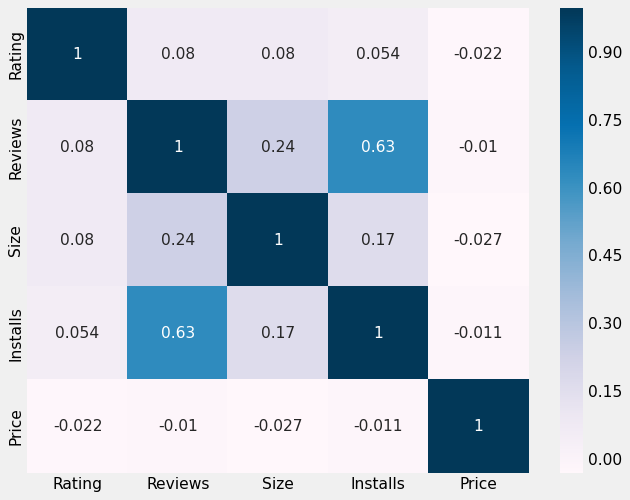

In [ ]:
rcParams['figure.figsize'] = 9, 7
plt.style.use('fivethirtyeight')
sns.heatmap(corelaction_matrix, annot=True, cmap='PuBu')
plt.show()

Наиболее заметна положительная линейная связь между количеством установок и количеством отызвов.

Rating

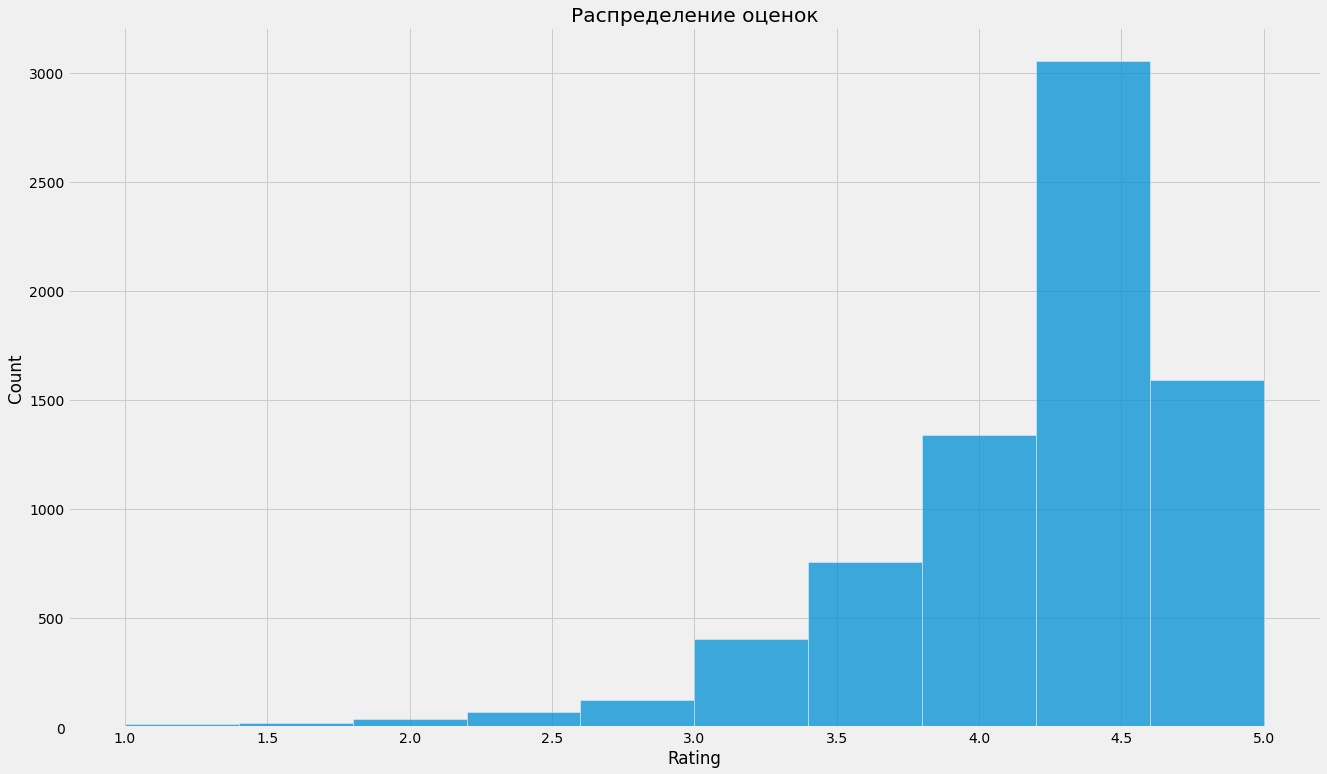

In [ ]:
sns.histplot(df['Rating'], bins=10)
plt.title('Распределение оценок')
plt.show()

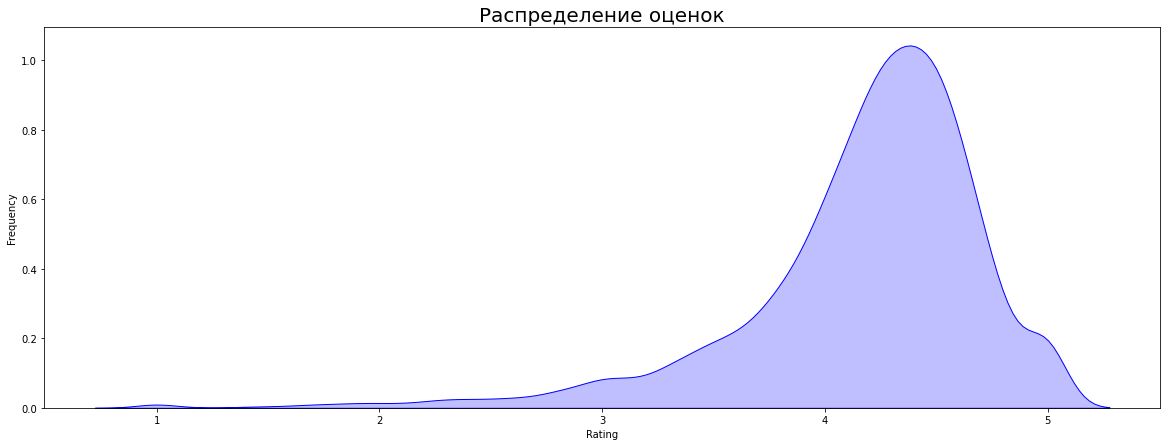

In [ ]:
# Ядерная оценка плотности:
rcParams['figure.figsize'] = 20, 7
g = sns.kdeplot(df.Rating, color="Blue", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Распределение оценок',size = 20)
plt.show()

In [ ]:
df[['Rating']].describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,7418.0,4.171394,0.549812,1.0,4.0,4.3,4.5,5.0


Видим, что пользователи чаще ставят хорошие оценки, 75% всех оценок находятся в диапазоне от 4 до 5 баллов, между первым и третьим квартилем

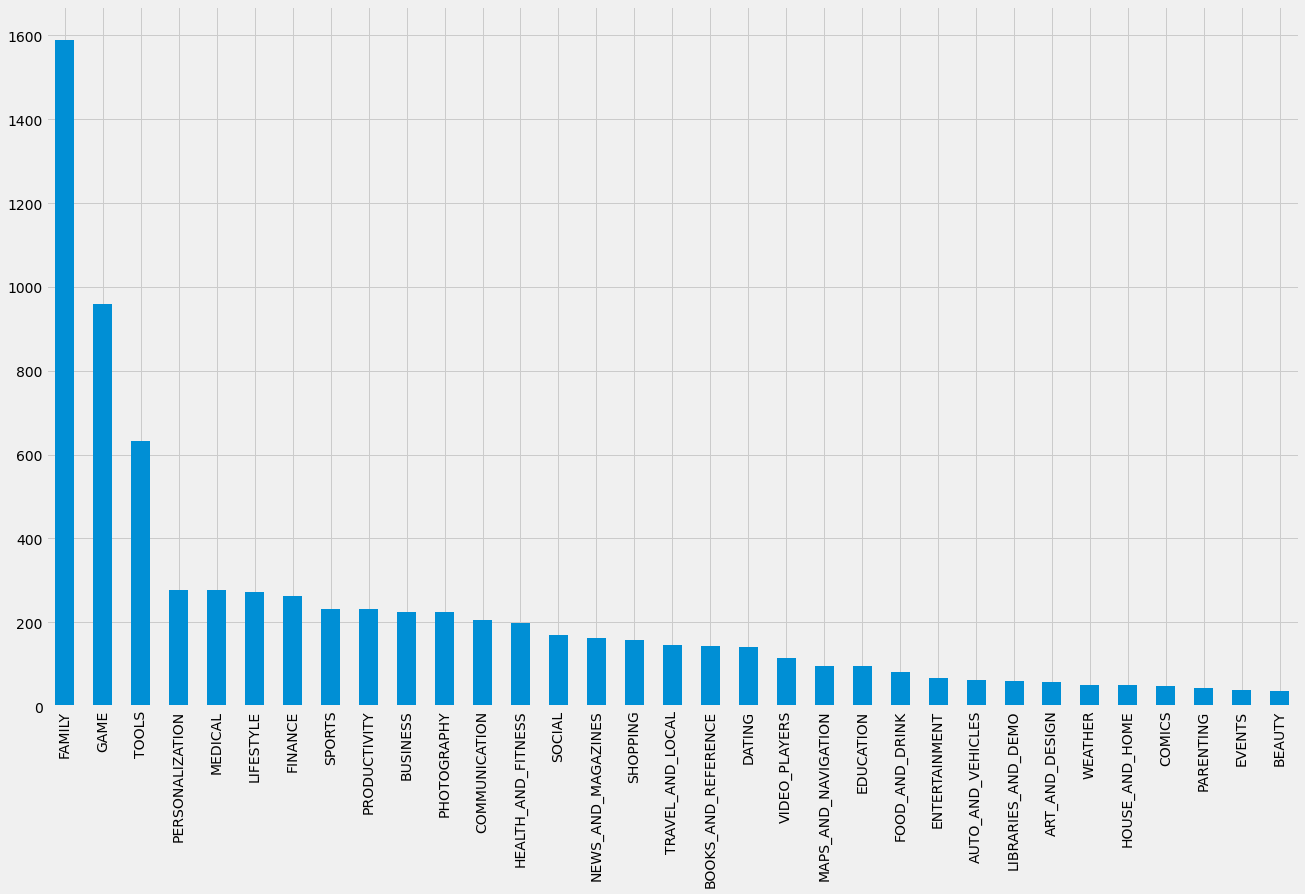

In [ ]:
df.Category.value_counts().plot(kind='bar')
plt.show()

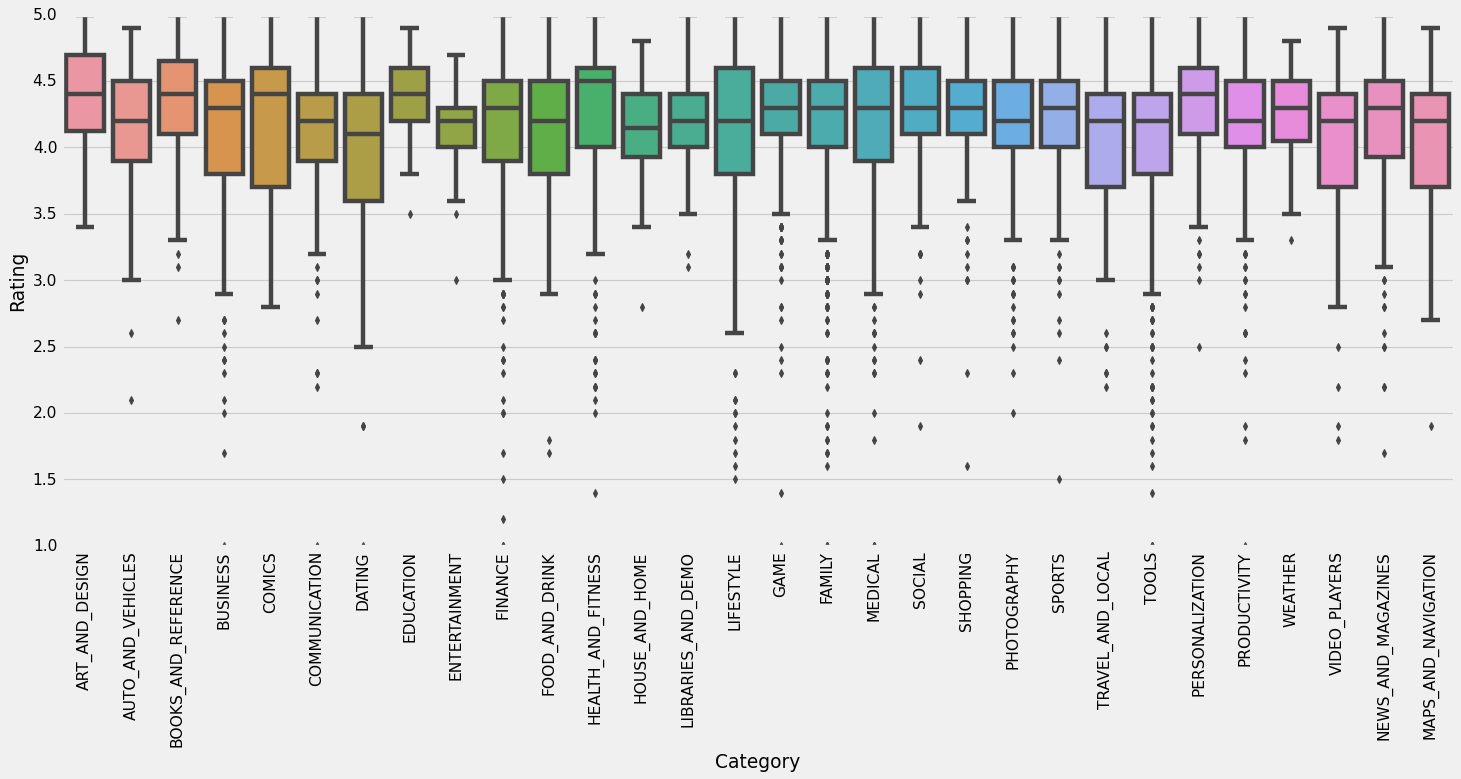

In [ ]:
plt.figure(figsize=(20,8))
top_30_categories = df['Category'].value_counts().sort_values(ascending=False).head(30).index.values

sns.boxplot(x="Category", y="Rating",
            data=df[df['Category'].isin(top_30_categories)])

plt.xticks(rotation=90)
plt.show()

Группа 1 - Наиболее надежные категории (q1 > 4.2 баллов): Art_and_design, Book_and_Reference, Education, Events

Группа 2 - категории с плохим рейтингом (q1 < 3.75): Dating, comics, Travel_and_local, Map_AND_Navigation

Группа 3 - категории с очень большим разбросом: Dating, LifeStile, Map_AND_Navigation

В случае выпуска новой игры, не рекоммендую рассматривать группы 2-3.



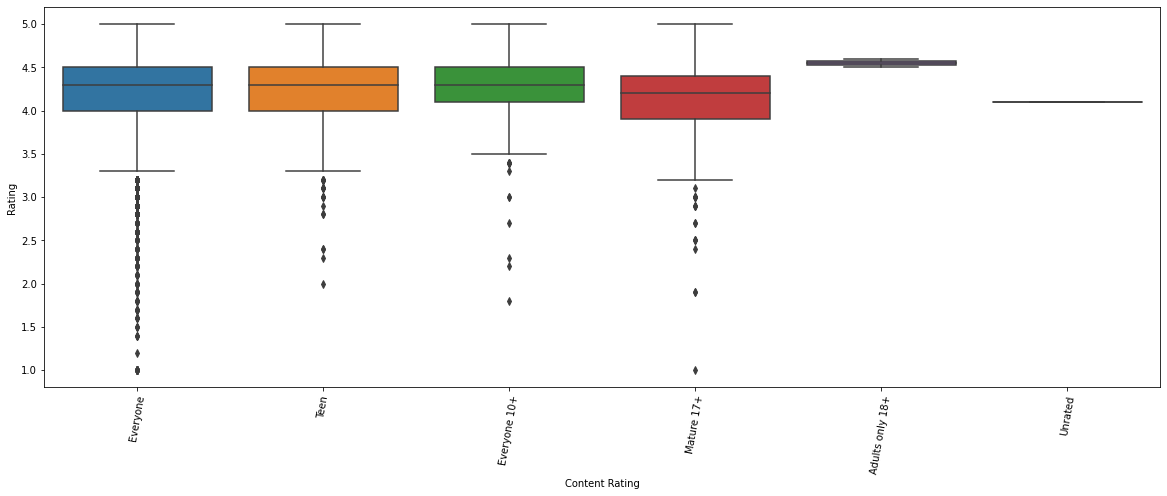

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(y='Rating',x='Content Rating',data = df)
plt.xticks(rotation=80)
plt.show()

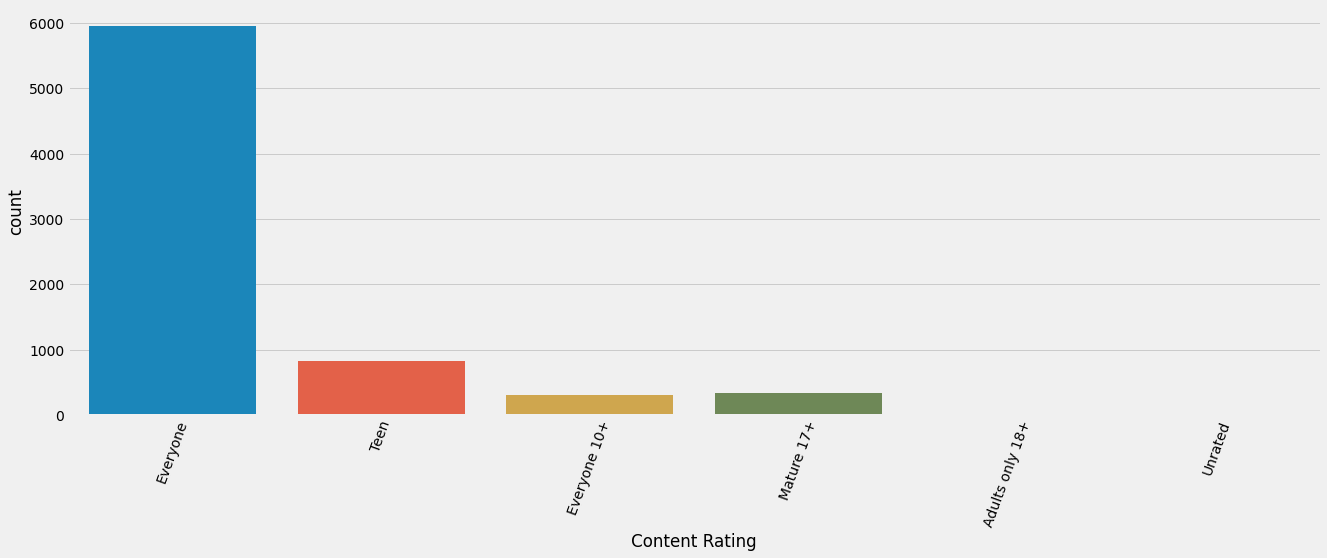

In [ ]:
plt.rcParams['figure.figsize'] = (20, 7)
sns.countplot(x='Content Rating',data=df)
plt.xticks(rotation=70)
plt.show()

Категория Mature 17+ оценивается хуже, чем остальные. Наиболее интересная "Everyone 10+" - Lower_bound находится на отметке 3.5, т.е.ниже 3.5 попадают только выбросы, это не типичные оценки для данной группы. При этом самая популярная является Everyone.

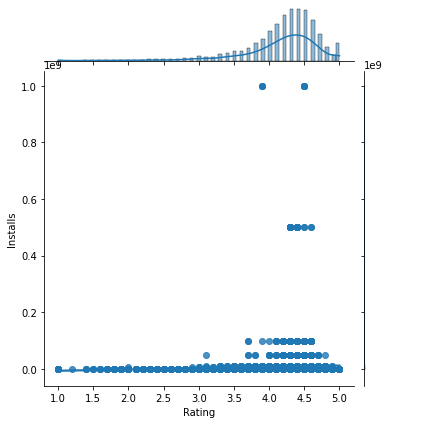

In [ ]:
sns.jointplot(x='Rating', y='Installs', data=df, kind='reg')
plt.show()

Довольно очевидная закономерность, чем выше рейтинг у игр, тем более часто их скачивают

Type

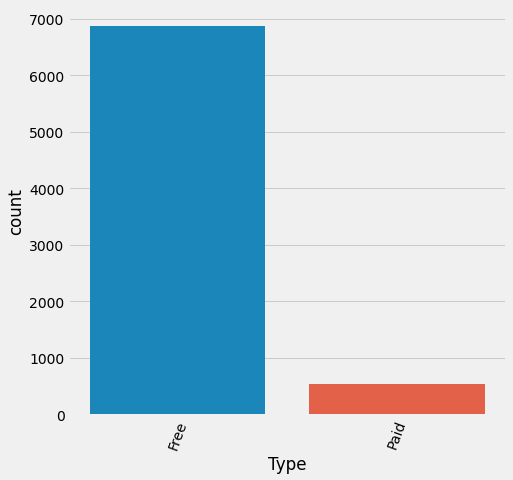

In [ ]:
rcParams['figure.figsize'] = 7, 7
sns.countplot(x='Type',data=df)
plt.xticks(rotation=70)
plt.show()

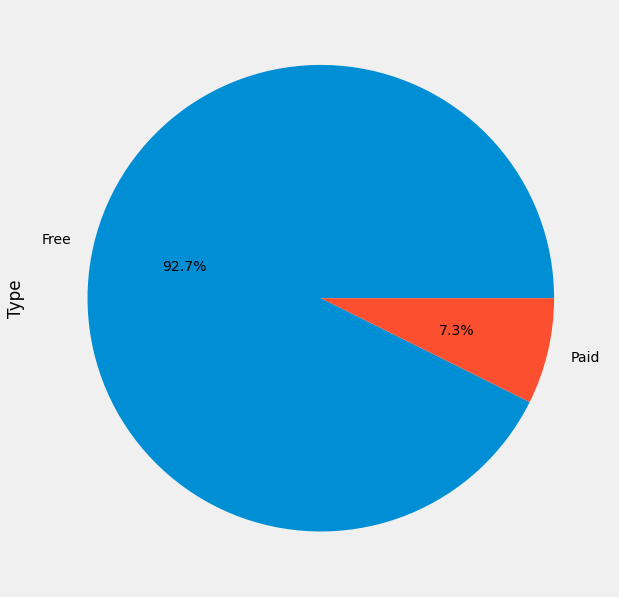

In [ ]:
rcParams['figure.figsize'] = 10, 10
df["Type"].value_counts().plot.pie(autopct = "%1.1f%%")
plt.show()

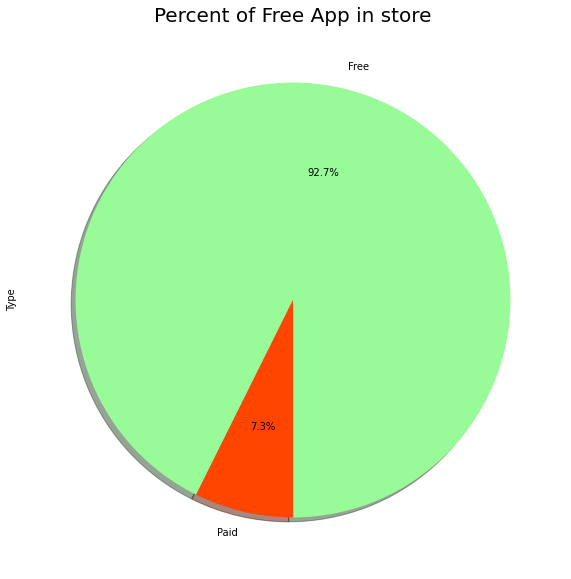

In [ ]:
rcParams['figure.figsize'] = 10, 10
colors = ["palegreen","orangered"]
df["Type"].value_counts().plot.pie(autopct = "%1.1f%%", colors=colors, \
                                   shadow=True, startangle=270)
plt.title('Percent of Free App in store',size = 20)
plt.show()

Видим, что Google play в подавляющем большинстве случаев публикует бесплатные игры

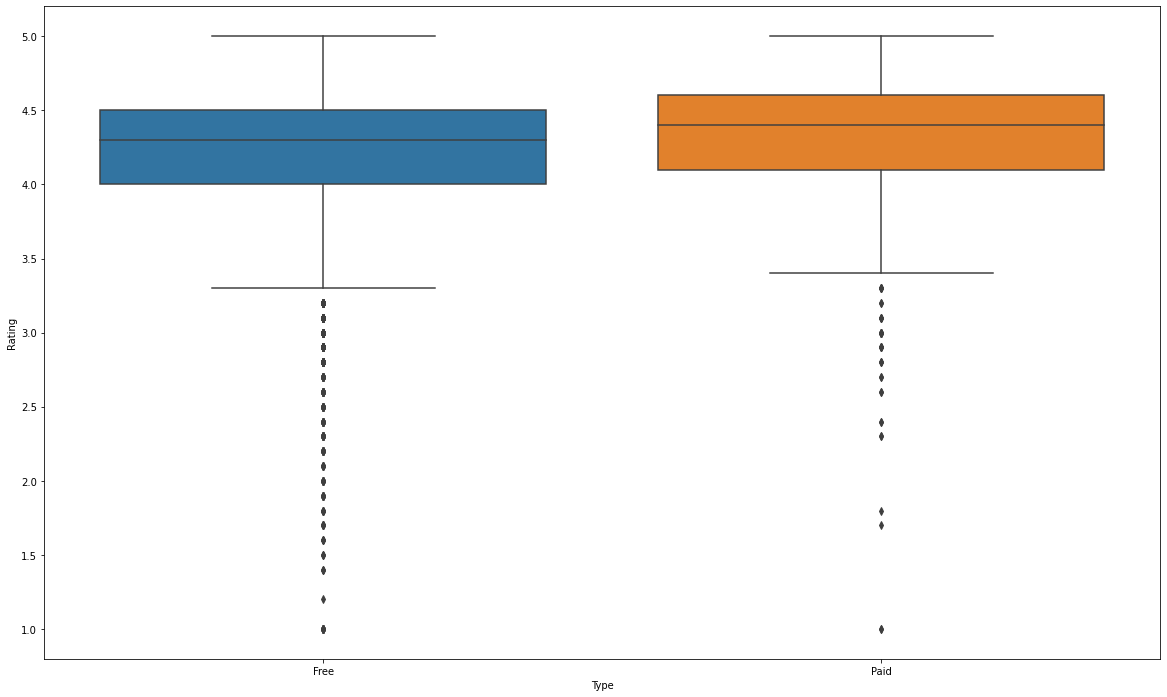

In [ ]:
plt.rcParams['figure.figsize'] = (20,12)
sns.boxplot(y='Rating', x='Type',data = df)

У платных игр рейтинг немного выше и меньше разброса в оценках

Installs

In [ ]:
df.groupby('Category').sum()[['Installs']].sort_values(by='Installs', ascending=False).style.bar(align='mid')

,Installs
Category,
GAME,26802452717
FAMILY,6696812580
TOOLS,3525553500
COMMUNICATION,3336915530
NEWS_AND_MAGAZINES,3214900550
PRODUCTIVITY,2711302080
PHOTOGRAPHY,2390893130
SHOPPING,1312731540
SPORTS,1062411465


Подавляющее большинство скачиваний приходится на категорию Game